# Plot examples of shallow, extended, or sub-surface events


This code plots parts of figure 1 in the related article

In [8]:
from matplotlib import pyplot as plt
import numpy as np
import datetime
from datetime import date
from datetime import timedelta
import glob
import shelve
import matplotlib.dates as mdates


# Import data ORS065

In [5]:
Name_platform = 'ORS065'

# Dataset
list_FILES = sorted(glob.glob('DATA_processed/SAVE_' + Name_platform + '_mhws_Strength2018' + '_z*.dir')) 
N_FILES = len(list_FILES)
Depth_all = np.zeros(N_FILES)+np.nan

ClimatologyPeriod = [1992, 2019]
MHWPeriod = [1992, 2019]
mhwname = 'MHWS_2020'
plot_folder  = 'FIGURES/' 

# Create a regular time vector from 1 Jan 1992 to 31 Dec 2019
times_dates = np.arange(
    datetime.datetime(ClimatologyPeriod[0], 1, 1),
    datetime.datetime(ClimatologyPeriod[1] + 1, 1, 1),
    datetime.timedelta(days=1)
).astype(datetime.datetime)
t = np.array([times_dates[i].toordinal() for i in range(len(times_dates))])




# Import data SST

(8035.0, 18262.0)

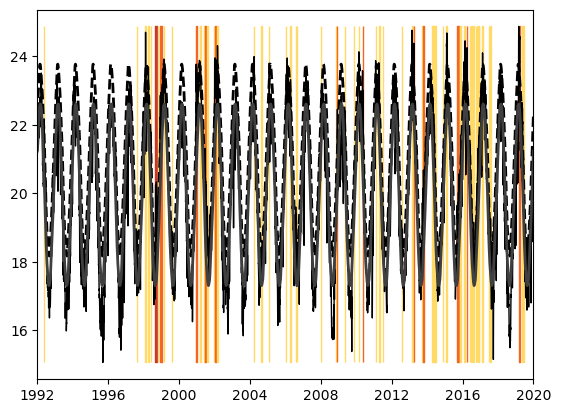

In [6]:
## Get the data from file
Name_platform_SST = 'SST_ESA'
d = shelve.open('SSAVE_' + Name_platform_SST + '_mhws_Strength2018_sst2019') 
mhws_SST = d['dict_mhws']  
clim_SST = d['dict_clim']
d.close()    

t_SST = clim_SST['t']
t_ESA = clim_SST['t']
sst_ESA = clim_SST['sst']
times_dates_ESA = clim_SST['times_dates']
dates = [date.fromordinal(t_ESA) for t_ESA in t]

col_thresh = 'k--'
col_clim = '0.25'

plt.plot(times_dates_ESA, sst_ESA, 'k-', linewidth=1)
plt.plot(dates, clim_SST['thresh'], col_thresh, linewidth=2)
plt.plot(dates, clim_SST['seas'], col_clim, linewidth=2)

# Fill events
col_cat0 = (.5, .5, .50) # no
col_cat1 =  (255/255, 218/255, 103/255) # Moderate
col_cat2 =  (242/255, 103/255, 33/255) # Strong
col_cat3 =  (203/255, 56/255, 38/255) # Severe
col_cat4 =  (127/255, 20/255, 22/255)# Extreme


for i in range(mhws_SST['n_events']):    
    t1 = np.where(t_ESA==mhws_SST['time_start'][i])[0][0]
    t2 = np.where(t_ESA==mhws_SST['time_end'][i])[0][0]
#        plt.fill_between(dates[t1:t2+1], sst[t1:t2+1], clim['thresh'][t1:t2+1], color=col_ev)
    if mhws_SST['category'][i] == 'Moderate':
        plt.fill_between(dates[t1:t2+1], np.nanmin(sst_ESA), np.nanmax(sst_ESA), color=col_cat1)
    if mhws_SST['category'][i] == 'Strong':
        plt.fill_between(dates[t1:t2+1], np.nanmin(sst_ESA), np.nanmax(sst_ESA), color=col_cat2)
    if mhws_SST['category'][i] == 'Severe':
        plt.fill_between(dates[t1:t2+1], np.nanmin(sst_ESA), np.nanmax(sst_ESA), color=col_cat3)
    if mhws_SST['category'][i] == 'Extreme':
        plt.fill_between(dates[t1:t2+1], np.nanmin(sst_ESA), np.nanmax(sst_ESA), color=col_cat4)

plt.xlim(datetime.datetime(MHWPeriod[0],1,1), datetime.datetime(MHWPeriod[1]+1,1,1))


DATA_processed\SAVE_ORS065_mhws_Strength2018_z01
DATA_processed\SAVE_ORS065_mhws_Strength2018_z05
DATA_processed\SAVE_ORS065_mhws_Strength2018_z10
DATA_processed\SAVE_ORS065_mhws_Strength2018_z15
DATA_processed\SAVE_ORS065_mhws_Strength2018_z20
DATA_processed\SAVE_ORS065_mhws_Strength2018_z25
DATA_processed\SAVE_ORS065_mhws_Strength2018_z30
DATA_processed\SAVE_ORS065_mhws_Strength2018_z35
DATA_processed\SAVE_ORS065_mhws_Strength2018_z40
DATA_processed\SAVE_ORS065_mhws_Strength2018_z45
DATA_processed\SAVE_ORS065_mhws_Strength2018_z50
DATA_processed\SAVE_ORS065_mhws_Strength2018_z53


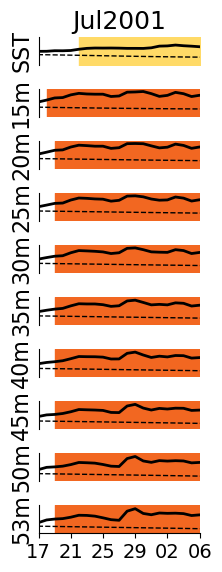

In [9]:
#### ARCTICLE figure 1 time-series

#Select which date for different panels
date_format = mdates.DateFormatter('%d')
date = datetime.datetime(2001,7,27); ylim0 = (16, 21) #  Full depth
# date = datetime.datetime(2018,1,17); ylim0 = (15, 25) # deep
# date = datetime.datetime(2000,12,29); ylim0 = (15, 25) # Shallow

fig = plt.figure(figsize=(2.5,6),facecolor='white')
plt.rc('font', size=16)

dates = [date.fromordinal(tt) for tt in t]
months = np.array([dates[tt].month for tt in range(len(dates))])

mhwname = 'MHW'
col_clim = 'k--' #'0.25'
col_thresh = 'k--'
col_evMax = 'r'
col_ev = (1, 0.6, 0.5)
col_bar = (1, 0.5, 0.5)
#From top to bottom: Blue, no marine heatwave, Moderate, Strong, Severe, Extreme
col_blue = (81/255, 99/255, 176/255) # blue
col_cat0 = (.5, .5, .50) # no
col_cat1 =  (255/255, 218/255, 103/255) # Moderate
col_cat2 =  (242/255, 103/255, 33/255) # Strong
col_cat3 =  (203/255, 56/255, 38/255) # Severe
col_cat4 =  (127/255, 20/255, 22/255)# Extreme



# Get SST MHW information
Name_platform_SST = 'SST_ESA'
d = shelve.open('SSAVE_' + Name_platform_SST + '_mhws_Strength2018_sst2019') 
mhws_SST = d['dict_mhws']  
clim_SST = d['dict_clim']
d.close()   

sst_ESA = clim_SST['sst']
t_ESA = clim_SST['t']
times_dates_ESA = clim_SST['times_dates']

# Plot SST MHWs at the surface
ax = plt.subplot(N_FILES-2,1,1)
plt.plot(times_dates_ESA, sst_ESA, 'k-', linewidth=2)
plt.ylim(ylim0[0],ylim0[1])
plt.ylabel('SST', size=16)
plt.plot(times_dates_ESA, clim_SST['seas'], col_clim, linewidth=1)

# Fill events
for i in range(mhws_SST['n_events']):    
    t1 = np.where(t_ESA==mhws_SST['time_start'][i])[0][0]
    t2 = np.where(t_ESA==mhws_SST['time_end'][i])[0][0]
#        plt.fill_between(dates[t1:t2+1], sst[t1:t2+1], clim['thresh'][t1:t2+1], color=col_ev)
    if mhws_SST['category'][i] == 'Moderate':
        plt.fill_between(dates[t1:t2+1], np.nanmin(sst_ESA), np.nanmax(sst_ESA), color=col_cat1)
    if mhws_SST['category'][i] == 'Strong':
        plt.fill_between(dates[t1:t2+1], np.nanmin(sst_ESA), np.nanmax(sst_ESA), color=col_cat2)
    if mhws_SST['category'][i] == 'Severe':
        plt.fill_between(dates[t1:t2+1], np.nanmin(sst_ESA), np.nanmax(sst_ESA), color=col_cat3)
    if mhws_SST['category'][i] == 'Extreme':
        plt.fill_between(dates[t1:t2+1], np.nanmin(sst_ESA), np.nanmax(sst_ESA), color=col_cat4)
    plt.xlim(date - timedelta(days = 10), date + timedelta(days = 10))



# Get ORS065 MHW information
Name_platform = 'ORS065_2020'

for f in range(N_FILES):
    ### Loop all files depths
    FILE = list_FILES[f][0:-4]     
    print(FILE)

    d = shelve.open(FILE) 
    depth = d['DEPTHS'] 
    mhws = d['dict_mhws']  
    clim = d['dict_clim']
    d.close()    

    if depth>14: # remove shallow short time-series
        ax = plt.subplot(N_FILES-2,1,f-2+1)
        plt.ylabel(str(depth) + 'm', size=16)
        plt.plot(times_dates, clim['sst'], 'k-', linewidth=2)
        plt.ylim(ylim0[0],ylim0[1])
        plt.plot(times_dates, clim['seas'], col_clim, linewidth=1)

        # Fill events
        for i in range(mhws['n_events']):    
            t1 = np.where(t==mhws['time_start'][i])[0][0]
            t2 = np.where(t==mhws['time_end'][i])[0][0]
            if mhws['category'][i] == 'Moderate':
                plt.fill_between(dates[t1:t2+1], ylim0[0], ylim0[1], color=col_cat1)
            if mhws['category'][i] == 'Strong':
                plt.fill_between(dates[t1:t2+1], ylim0[0], ylim0[1], color=col_cat2)
            if mhws['category'][i] == 'Severe':
                plt.fill_between(dates[t1:t2+1], ylim0[0], ylim0[1], color=col_cat3)
            if mhws['category'][i] == 'Extreme':
                plt.fill_between(dates[t1:t2+1], ylim0[0], ylim0[1], color=col_cat4)
        plt.xlim(date - timedelta(days = 10), date + timedelta(days = 10))

    if depth < 5:
        ax.set_title(date.strftime("%b") + date.strftime("%Y"), fontsize=18)
        
    if depth < 52:
        ax.get_xaxis().set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.set_yticks([])
    else:
        # Hide the right and top spines
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        # Only show ticks on the left and bottom spines
        ax.yaxis.set_ticks_position('left')
        ax.xaxis.set_ticks_position('bottom')
        ax.set_yticks([])
        ax.xaxis.set_major_formatter(date_format)
        plt.xticks(fontsize=14 ) 
        ax.xaxis.set_major_locator(plt.MaxNLocator(5))

fig.tight_layout()
plt.savefig(plot_folder + 'Plot_sst_timeseries_cat_alldepth_categories_zoom' + str(date)[0:10] + '.png')
plt.show()            

